# Lab 2

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Class

In [31]:
class Explorer:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.cat_cols, self.quan_cols = self.check_variables()

    def check_variables(self):
        cols = self.data.columns
        quantitative_cols = self.data._get_numeric_data().columns
        categorical_cols = list(set(cols) - set(quantitative_cols))
        return categorical_cols, list(set(quantitative_cols))


    def categorical(self):
        # For categorical variables

        for col in self.cat_cols:
            print('Examin: ', col)
            print(self.data[col].value_counts())
            plt.figure()
            self.data.groupby(col).size().plot(kind='pie',ylabel=col, autopct='%.2f%%')
            plt.show()
            plt.figure()
            self.data.groupby(col).size().plot(kind='bar', rot=0, colormap='Paired')
            plt.show()

    def quantitative(self):
        # For quantitative variables
        
        for col in self.quan_cols:
            print('********************** Examin: ', col)
            print(self.data[col].describe())

            plt.figure()
            self.data[col].hist(bins=20)
            plt.title(f'Histogram of {col}')
            plt.show()

            Q75 = self.data[col].quantile(0.75)
            Q25 = self.data[col].quantile(0.25)
            IQR = Q75 - Q25

            print('Outliers: ')
            print(self.data[(self.data[col] < Q25 - 1.5*IQR) | (self.data[col] > Q75 + 1.5*IQR)][col])


            plt.figure()
            plt.boxplot(x=self.data[col], labels=[col])
            plt.ylabel(col)
            plt.title(f'Boxplot of {col}')
            plt.show()

    def quantitative_md(self):
        # For markdown

        for i, col in enumerate(self.quan_cols):
            
            Q75 = self.data[col].quantile(0.75)
            Q25 = self.data[col].quantile(0.25)
            IQR = Q75 - Q25

            outliers = len(self.data[(self.data[col] < Q25 - 1.5*IQR) | (self.data[col] > Q75 + 1.5*IQR)][col])

            md = f'''**{i+1}. {col}**  
The distribution ranges from {self.data[col].min()} to {self.data[col].max()} and is skewed right with only one peak.  
The mean value is {self.data[col].mean()}, the std is {self.data[col].std()}, the mode is {self.data[col].mode().values} and the median is {self.data[col].median()}.  
The 25 and 75 quantiles are {Q25} and {Q75}, the IQR is {IQR}, and there are {outliers} outliers.  '''
            print(md)

In [23]:
explorer = Explorer('insurance.csv')

## Dataset Interpretation

There are 1338 rows and 7 columns in the dataset.  
Categorical variables are ['sex', 'smoker', 'region'].  
Quantitative variables are ['age', 'bmi', 'children', 'charges'].

In [24]:
explorer.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
explorer.data.shape

(1338, 7)

In [26]:
explorer.data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:

print('Categorical Varibles: ', explorer.cat_cols)
print('Quantitative Varibles: ', explorer.quan_cols)

Categorical Varibles:  ['sex', 'region', 'smoker']
Quantitative Varibles:  ['charges', 'children', 'age', 'bmi']


## Examine all categorical variables

**1. sex**  
There are 2 values of sex: 'male' and 'female'  
Count of 'male' is 676, which is 50.52% of total number  
Count of 'female' is 662, which is 49.48% of total number  
  
**2. region**  
There are 4 values of region: 'southeast', 'southwest', 'northwest' and 'northeast'  
Count of 'southeast' is 364, which is 27.2% of total number  
Count of 'southwest' is 325, which is 24.29% of total number
Count of 'northwest' is 325, which is 24.29% of total number    
Count of 'northeast' is 324, which is 24.22% of total number  
  
**3. smoker**  
There are 2 values of sex: 'no' and 'yes'  
Count of 'no' is 1064, which is 79.52% of total number  
Count of 'yes' is 274, which is 20.48% of total number  

Examin:  sex
sex
male      676
female    662
Name: count, dtype: int64


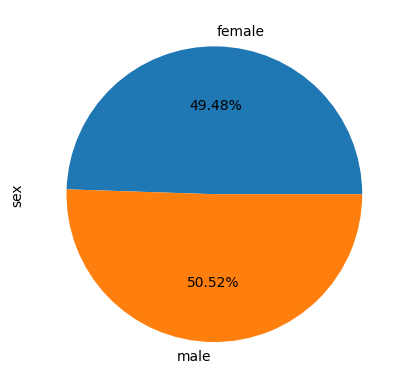

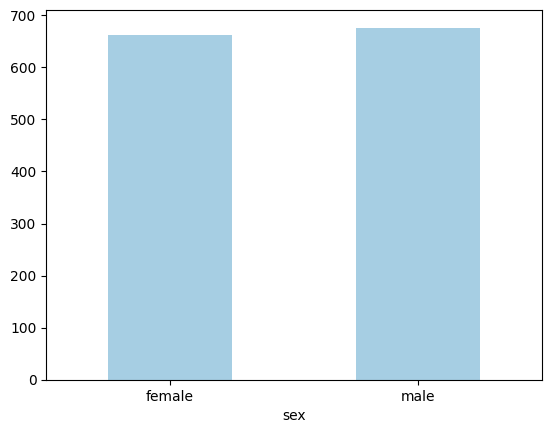

Examin:  region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


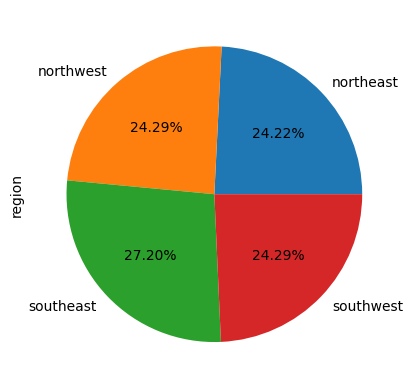

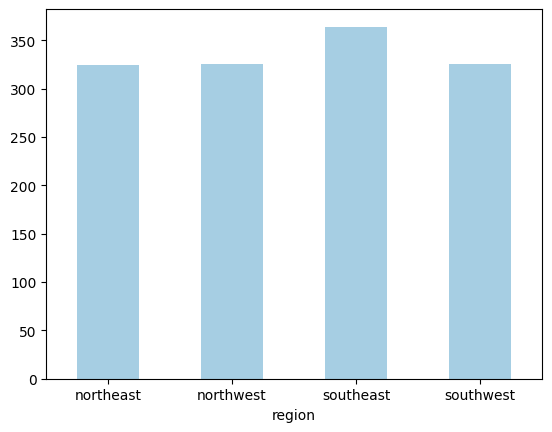

Examin:  smoker
smoker
no     1064
yes     274
Name: count, dtype: int64


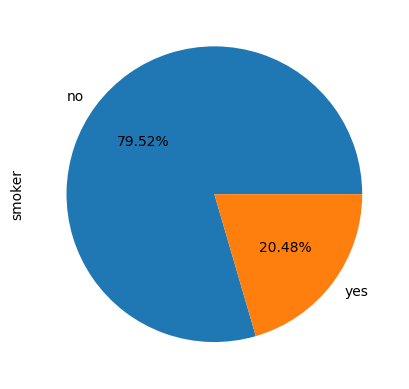

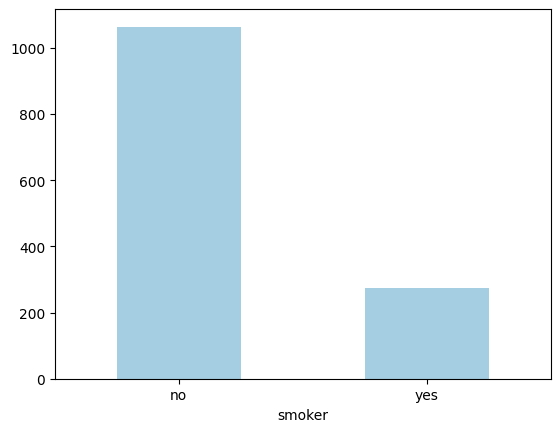

In [28]:
explorer.categorical()

## Examine all quantitative variables

**1. charges**  
The distribution ranges from 1121.8739 to 63770.42801 and is skewed right with only one peak.  
The mean value is 13270.422265141257, the std is 12110.011236694001, the mode is [1639.5631] and the median is 9382.033.  
The 25 and 75 quantiles are 4740.28715 and 16639.912515, the IQR is 11899.625365, and there are 139 outliers.  
  
**2. children**  
The distribution ranges from 0 to 5 and is skewed right with only one peak.  
The mean value is 1.0949177877429, the std is 1.205492739781914, the mode is [0] and the median is 1.0.  
The 25 and 75 quantiles are 0.0 and 2.0, the IQR is 2.0, and there are 0 outliers.  
  
**3. age**  
The distribution ranges from 18 to 64 and is skewed right with only one peak.  
The mean value is 39.20702541106129, the std is 14.049960379216154, the mode is [18] and the median is 39.0.  
The 25 and 75 quantiles are 27.0 and 51.0, the IQR is 24.0, and there are 0 outliers.  
  
**4. bmi**  
The distribution ranges from 15.96 to 53.13 and is skewed right with only one peak.  
The mean value is 30.66339686098655, the std is 6.098186911679014, the mode is [32.3] and the median is 30.4.  
The 25 and 75 quantiles are 26.29625 and 34.69375, the IQR is 8.3975, and there are 9 outliers.  

********************** Examin:  charges
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


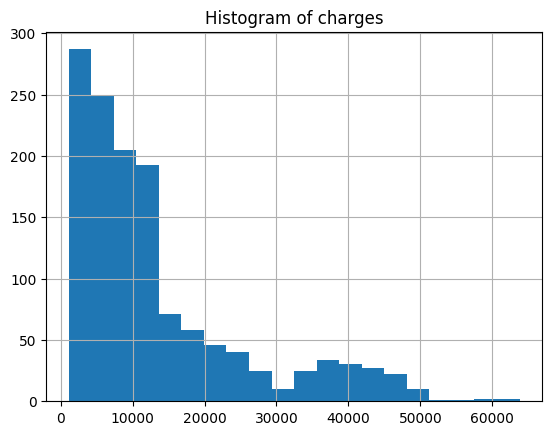

Outliers: 
14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64


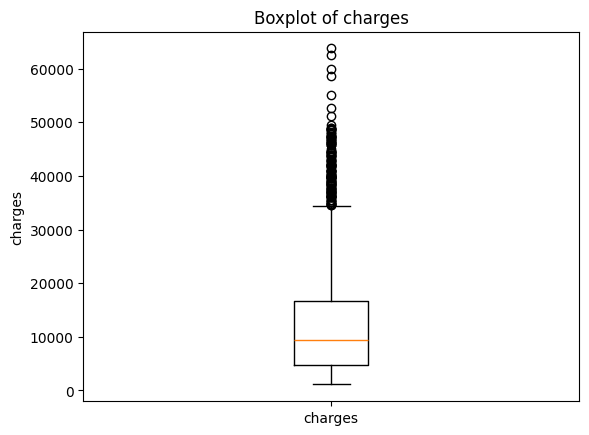

********************** Examin:  children
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


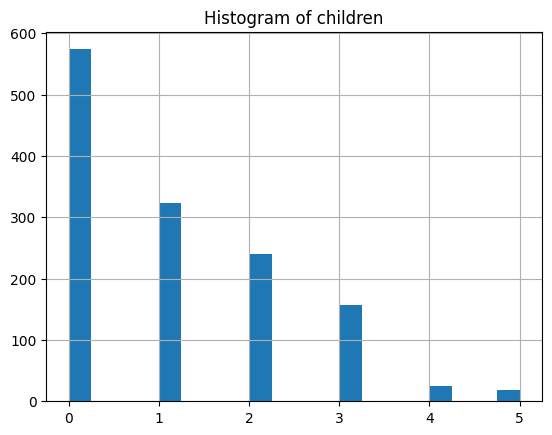

Outliers: 
Series([], Name: children, dtype: int64)


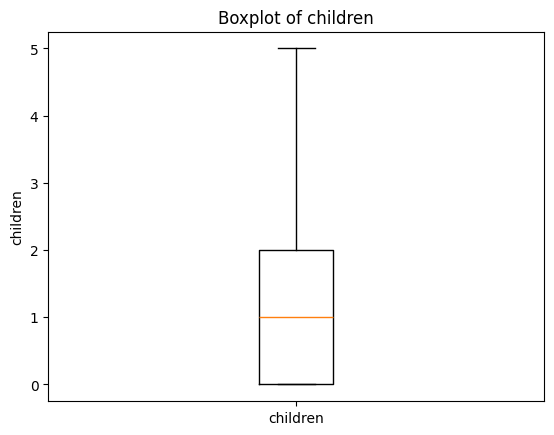

********************** Examin:  age
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


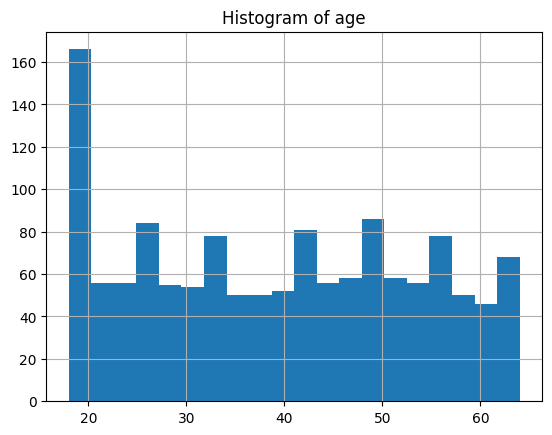

Outliers: 
Series([], Name: age, dtype: int64)


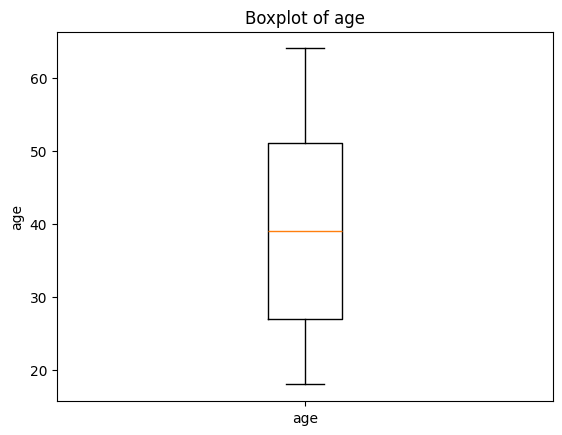

********************** Examin:  bmi
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


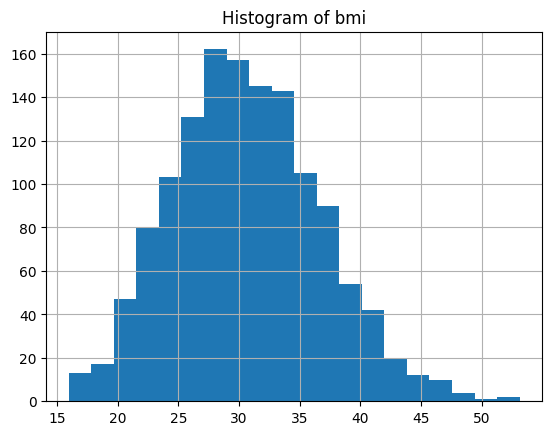

Outliers: 
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64


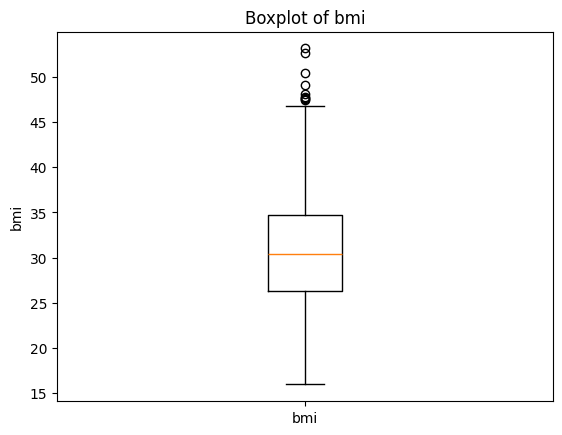

In [29]:
explorer.quantitative()

In [30]:
explorer.quantitative_md()

**1. charges**  
The distribution ranges from 1121.8739 to 63770.42801 and is skewed right with only one peak.  
The mean value is 13270.422265141257, the std is 12110.011236694001, the mode is [1639.5631] and the median is 9382.033.  
The 25 and 75 quantiles are 4740.28715 and 16639.912515, the IQR is 11899.625365, and there are 139 outliers.  
**2. children**  
The distribution ranges from 0 to 5 and is skewed right with only one peak.  
The mean value is 1.0949177877429, the std is 1.205492739781914, the mode is [0] and the median is 1.0.  
The 25 and 75 quantiles are 0.0 and 2.0, the IQR is 2.0, and there are 0 outliers.  
**3. age**  
The distribution ranges from 18 to 64 and is skewed right with only one peak.  
The mean value is 39.20702541106129, the std is 14.049960379216154, the mode is [18] and the median is 39.0.  
The 25 and 75 quantiles are 27.0 and 51.0, the IQR is 24.0, and there are 0 outliers.  
**4. bmi**  
The distribution ranges from 15.96 to 53.13 and is skewed ri